In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [9]:
# Recreate the dataset
df = pd.DataFrame({
    'Age': [40, 49, 37, 48, 61, 60, 58, 66, 54, 44],
    'Cholesterol': [289, 180, 215, 240, 312, 400, 180, 210, 198, 250],
    'MaxHR': [172, 160, 150, 145, 130, 120, 140, 135, 148, 155],
    'Oldpeak': [1.0, 2.3, 0.5, 1.5, 0.0, 2.6, 0.1, 1.8, 2.1, 0.6],
    'RestingBP': [140, 160, 130, 120, 110, 150, 145, 138, 132, 125]  # target
})


In [10]:
X = df[['Age', 'Cholesterol', 'MaxHR', 'Oldpeak']]
y = df['RestingBP']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)


MAE: 12.255602122008384
MSE: 150.92318794943412
R² Score: 0.22998373495186675


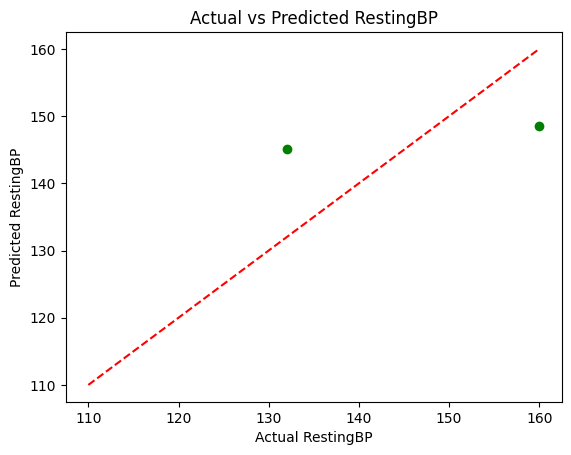

In [12]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual RestingBP')
plt.ylabel('Predicted RestingBP')
plt.title('Actual vs Predicted RestingBP')
plt.show()


In [13]:
print("Intercept:", model.intercept_)
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef}")


Intercept: 84.93333023764873
Age: 0.26991951716214213
Cholesterol: -0.025816011589959914
MaxHR: 0.21749164961068834
Oldpeak: 8.819026689232064
